# INTRO

* El dataset elegido es El Costo de Vida por Ciudad o País.

* La idea de analizar este dataset es, mediante el uso de ML, tratar de encontrar que países o ciudades tiene características similares para agruparlas, y posteriormente determinar qué países o ciudades (dentro de los grupos) son las mejores para desarrollar y vivir, enfocado en individuos que desean buscar otros horizontes y por otro lado, con una mirada comercial, una inversión inmobiliaria según la relación entre el ingreso y el gasto de sus ciudadanos.

* Con este objetivo presente, las preguntas son que grupo de países son parecidos según las variables provistas por el dataset. Posteriormente, qué ciudades tiene mejores promedios en la relación entre salario y costo de vida, para tomar decisiones según lo planteado tanto comercial como individualmente.

* Generé un filtrado de algunas Países y sus ciudades repartidos en los 5 continentes para comparar y graficar mejor los datos.

* Estos datos, nos van marcado patrones de precios de costo de vida muy determinantes según la región del planeta que nos encontramos y sus características socioeconómicas. Tenemos idea normalmente de estos datos pero verlos con números o gráficos, acentúan mucho más el entendimiento.

* En base a esto, ya podemos decir que los países desarrollados, parecerían tener costos de vida más altos, pero la relación con el ingreso es muy superior que en los no desarrollados, por eso ya tendríamos una respuesta en cuanto a la elección de países para vivir. Está claro que sólo estamos analizando variables numéricas y no sociales que también son determinantes para este tipo de elección.

* También podemos empezar a responder con respecto a un desarrollo inmobiliario (sacando datos que no conocemos como: normativas, densidad poblacional, crédito, cantidad de ciudadanos, etc., ) que las personas que viven en un país desarrollado pueden acceder más rápidamente a pagar un crédito y liquidarlo en menor tiempo que en el otro grupo. Como en Australia con ingresos medios de $ 3500, aunque su costo por M2 sea más elevado también.

* Análisis Exploratorio de Datos (EDA)

* Definición de objetivo: Qué ciudades o países son mejores para vivir según sus costos de vida y en dónde se recomienda invertir en proyecto inmobiliario?
* Contexto comercial: A través de los datos sobre el costo de vida, queremos proyectar un informe de mejores países para vivir y responder a una empresa de capitales de inversión, donde poner dinero para un desarrollo de viviendas.
* Problema Comercial: Existen grupos de ciudades que se diferencian de otras según sus costos de vida? Cuál es la relación entre ingreso y costo del m2 promedio en esos grupos? Podemos hacer recomendaciones de inversión sin contar con datos demográficos o información de leyes o normas del lugar? Dependiendo del riesgo del inversor, es más rentable un país en desarrollo o uno que ya lo está, analizando salario y gastos?
* Contexto analítico: Extraemos los datos del dataset de costo de vida, en donde encontramos 54 variables para analizar. Debemos transformar columnas, normalizar números y nulos. Verificar datos buenos y malos. Posteriormente construímos gráficos para visualizar resultados y comparar.
* Exploración de datos (EDA): como indicamos previamente, los países desarrollados tienen ingresos muy superiores a los que no lo están, aunque también observamos que el costo por m2 también es más elevado. Basándonos en esta relación, en países como Australia (usd3500) o Alemania(usd2500), un individuo podrá pagar más rápidamente un crédito que en Egipto (usd200) O Pakistán (usd200). El último gráfico de barras, donde tenemos de un lado el ingreso y el otro el costo del m2, se ve bastante armónico o relacionado, salvo en casos como China o Argentina donde el costo por m2 es mucho más elevado visualmente que el salario. En el caso específico de Argentina, se debe a una tremenda inflación y devaluación del salario (usd300), aunque también genera una oportunidad a largo plazo de recuperación, de invertir en proyectos inmobiliarios actuales (usd2500 m2), para apostar a una recuperación futura.

# MONTADO DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ACCESO RUTA

In [2]:
ruta = '/content/drive/MyDrive/Curso Data Science/Dataset/cost-of-living.csv'


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# IMPORTADO LIBRERIAS

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pandas_profiling
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.cluster import KMeans

# LECTURA BASE DE DATOS

In [ ]:
df_livingcost = pd.read_csv(ruta)
df_livingcost

Unnamed: 0                city      country     x1     x2     x3     x4  \
0              0               Delhi        India   4.90  22.04   4.28   1.84   
1              1            Shanghai        China   5.59  40.51   5.59   1.12   
2              2             Jakarta    Indonesia   2.54  22.25   3.50   2.02   
3              3              Manila  Philippines   3.54  27.40   3.54   1.24   
4              4               Seoul  South Korea   7.16  52.77   6.03   3.02   
...          ...                 ...          ...    ...    ...    ...    ...   
4869        4869        Peterborough    Australia    NaN    NaN    NaN    NaN   
4870        4870          Georgetown    Australia    NaN    NaN    NaN    NaN   
4871        4871  Ixtapa Zihuatanejo       Mexico   5.19  31.13  12.97   0.99   
4872        4872             Iqaluit       Canada  29.78  74.61  13.77   6.70   
4873        4873              Neiafu        Tonga    NaN  29.53  10.55  10.55   

        x5    x6    x7  ...     x47      x48     x49      x50      x51  \
0     3.67  1.78  0.48  ...   36.26   223.87  133.38   596.16   325.82   
1     4.19  3.96  0.52  ...  121.19  1080.07  564.30  2972.57  1532.23   
2     3.18  2.19  0.59  ...   80.32   482.85  270.15  1117.69   584.37   
3     1.90  2.91  0.93  ...   61.82   559.52  281.78  1754.40   684.81   
4     4.52  3.86  1.46  ...  108.30   809.83  583.60  2621.05  1683.74   
...    ...   ...   ...  ...     ...      ...     ...      ...      ...   
4869   NaN   NaN   NaN  ...     NaN      NaN     NaN      NaN      NaN   
4870   NaN   NaN   NaN  ...     NaN      NaN     NaN      NaN      NaN   
4871   NaN  1.82  0.62  ...  103.78   415.11  259.44   518.89   415.11   
4872  8.93  3.72  3.54  ...     NaN      NaN     NaN  2978.11  2978.11   
4873   NaN   NaN  2.11  ...     NaN      NaN     NaN      NaN      NaN   

           x52       x53      x54   x55  data_quality  
0      2619.46   1068.90   586.35  7.96           1.0  
1     17333.09   9174.88  1382.83  5.01           1.0  
2      2694.05   1269.44   483.19  9.15           1.0  
3      3536.04   2596.44   419.02  7.80           1.0  
4     21847.94  10832.90  2672.23  3.47           1.0  
...        ...       ...      ...   ...           ...  
4869       NaN       NaN      NaN   NaN           0.0  
4870       NaN       NaN      NaN   NaN           0.0  
4871       NaN       NaN      NaN   NaN           0.0  
4872       NaN       NaN      NaN  6.53           0.0  
4873       NaN       NaN      NaN   NaN           0.0  

[4874 rows x 59 columns]

# VARIABLES BASE DE DATOS: costo de vida por ciudad

4874 rows × 59 columns

Entender y cuantificar los costos de vida según ciudad, analizando las distintas variables ofrecidas.

* Column	Description
* city	Name of the city
* country	Name of the country
* x1	Meal, Inexpensive Restaurant (USD)
* x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)
* x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)
* x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)
* x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)
* x6	Cappuccino (regular, in restaurants) (USD)
* x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
* x8	Water (0.33 liter bottle, in restaurants) (USD)
* x9	Milk (regular), (1 liter) (USD)
* x10	Loaf of Fresh White Bread (500g) (USD)
* x11	Rice (white), (1kg) (USD)
* x12	Eggs (regular) (12) (USD)
* x13	Local Cheese (1kg) (USD)
* x14	Chicken Fillets (1kg) (USD)
* x15	Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
* x16	Apples (1kg) (USD)
* x17	Banana (1kg) (USD)
* x18	Oranges (1kg) (USD)
* x19	Tomato (1kg) (USD)
* x20	Potato (1kg) (USD)
* x21	Onion (1kg) (USD)
* x22	Lettuce (1 head) (USD)
* x23	Water (1.5 liter bottle, at the market) (USD)
* x24	Bottle of Wine (Mid-Range, at the market) (USD)
* x25	Domestic Beer (0.5 liter bottle, at the market) (USD)
* x26	Imported Beer (0.33 liter bottle, at the market) (USD)
* x27	Cigarettes 20 Pack (Marlboro) (USD)
* x28	One-way Ticket (Local Transport) (USD)
* x29	Monthly Pass (Regular Price) (USD)
* x30	Taxi Start (Normal Tariff) (USD)
* x31	Taxi 1km (Normal Tariff) (USD)
* x32	Taxi 1hour Waiting (Normal Tariff) (USD)
* x33	Gasoline (1 liter) (USD)
* x34	Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
* x35	Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
* x36	Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
* x37	1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
* x38	Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
* x39	Fitness Club, Monthly Fee for 1 Adult (USD)
* x40	Tennis Court Rent (1 Hour on Weekend) (USD)
* x41	Cinema, International Release, 1 Seat (USD)
* x42	Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
* x43	International Primary School, Yearly for 1 Child (USD)
* x44	1 Pair of Jeans (Levis 501 Or Similar) (USD)
* x45	1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
* x46	1 Pair of Nike Running Shoes (Mid-Range) (USD)
* x47	1 Pair of Men Leather Business Shoes (USD)
* x48	Apartment (1 bedroom) in City Centre (USD)
* x49	Apartment (1 bedroom) Outside of Centre (USD)
* x50	Apartment (3 bedrooms) in City Centre (USD)
* x51	Apartment (3 bedrooms) Outside of Centre (USD)
* x52	Price per Square Meter to Buy Apartment in City Centre (USD)
* x53	Price per Square Meter to Buy Apartment Outside of Centre (USD)
* x54	Average Monthly Net Salary (After Tax) (USD)
* x55	Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
* data_quality	0 if Numbeo considers that more contributors are needed to increase data quality, else 1

In [ ]:
# Como cambiar nombre: data.rename (columns={'Unnamed: 0': 'index','city': 'City', 'country': 'Country'})

# RENOMBRADO COLUMNAS

In [ ]:
df_livingcost.columns = ['Index', 'City','Country', 'Meal', 'Mealx2', 'McMeal', 'DomesticBeer', 'ImportedBeer', 'Capuccino', 'Coke', 'Water', 'Milk', 'Bread', 'Rice', 'Eggs', 'Cheese', 'Chicken', 'Beef', 'Apple', 'Banana', 'Oranges', 'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water', 'Wine', 'DomesticBeer', 'ImportedBeer', 'Cigarettes', 'Ticket', 'MonthlyPass', 'TaxiStart', 'Taxi1km', 'Taxi1hour', 'Gasoline', 'VolkswagenGolf', 'ToyotaCorolla', 'BasicApartment', 'Prepaid1m', 'Internet', 'FitnessClub', 'Tennis', 'Cinema', 'Preschool', 'PrimarySchool', 'Jeans', 'Dress', 'Nike', 'Shoes', 'Apart1', 'Apart1out', 'Apart3', 'Apart3out', 'BuyApartm2', 'BuyApartm2out', 'Salary', 'Rate', 'DataQuality' ]

Elimino la columna Index

In [ ]:
df_livingcost.drop('Index', axis='columns', inplace=True)

In [ ]:
df_livingcost

City      Country   Meal  Mealx2  McMeal  DomesticBeer  \
0                  Delhi        India   4.90   22.04    4.28          1.84   
1               Shanghai        China   5.59   40.51    5.59          1.12   
2                Jakarta    Indonesia   2.54   22.25    3.50          2.02   
3                 Manila  Philippines   3.54   27.40    3.54          1.24   
4                  Seoul  South Korea   7.16   52.77    6.03          3.02   
...                  ...          ...    ...     ...     ...           ...   
4869        Peterborough    Australia    NaN     NaN     NaN           NaN   
4870          Georgetown    Australia    NaN     NaN     NaN           NaN   
4871  Ixtapa Zihuatanejo       Mexico   5.19   31.13   12.97          0.99   
4872             Iqaluit       Canada  29.78   74.61   13.77          6.70   
4873              Neiafu        Tonga    NaN   29.53   10.55         10.55   

      ImportedBeer  Capuccino  Coke  Water  ...   Shoes   Apart1  Apart1out  \
0             3.67       1.78  0.48   0.19  ...   36.26   223.87     133.38   
1             4.19       3.96  0.52   0.32  ...  121.19  1080.07     564.30   
2             3.18       2.19  0.59   0.27  ...   80.32   482.85     270.15   
3             1.90       2.91  0.93   0.51  ...   61.82   559.52     281.78   
4             4.52       3.86  1.46   0.78  ...  108.30   809.83     583.60   
...            ...        ...   ...    ...  ...     ...      ...        ...   
4869           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4870           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4871           NaN       1.82  0.62   0.42  ...  103.78   415.11     259.44   
4872          8.93       3.72  3.54   4.10  ...     NaN      NaN        NaN   
4873           NaN        NaN  2.11   2.11  ...     NaN      NaN        NaN   

       Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary  Rate  \
0      596.16     325.82     2619.46        1068.90   586.35  7.96   
1     2972.57    1532.23    17333.09        9174.88  1382.83  5.01   
2     1117.69     584.37     2694.05        1269.44   483.19  9.15   
3     1754.40     684.81     3536.04        2596.44   419.02  7.80   
4     2621.05    1683.74    21847.94       10832.90  2672.23  3.47   
...       ...        ...         ...            ...      ...   ...   
4869      NaN        NaN         NaN            NaN      NaN   NaN   
4870      NaN        NaN         NaN            NaN      NaN   NaN   
4871   518.89     415.11         NaN            NaN      NaN   NaN   
4872  2978.11    2978.11         NaN            NaN      NaN  6.53   
4873      NaN        NaN         NaN            NaN      NaN   NaN   

      DataQuality  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
4869          0.0  
4870          0.0  
4871          0.0  
4872          0.0  
4873          0.0  

[4874 rows x 58 columns]

# SELECCION PAISES PARA ANALIZAR

In [ ]:
# Realizo una selección de países para hacer análisis
df_seleccion = df_livingcost.loc[df_livingcost['Country'].isin(('Argentina', 'Australia', 'Canada', 'Brazil', 'France', 'Germany', 'China', 'Pakistan', 'Egypt', 'Kenya', 'Russia'))]
# df_seleccion = df_livingcost.loc[df_livingcost['Country'] == 'Argentina']
df_seleccion


City    Country   Meal  Mealx2  McMeal  DomesticBeer  \
1         Shanghai      China   5.59   40.51    5.59          1.12   
7        Guangzhou      China   4.05   27.94    4.89          0.84   
9          Beijing      China   4.19   30.73    5.59          1.40   
12         Karachi   Pakistan   2.23   11.14    3.56          2.12   
14       Sao Paulo     Brazil   7.45   37.27    6.52          2.24   
...            ...        ...    ...     ...     ...           ...   
4866    Scottsdale  Australia    NaN     NaN     NaN           NaN   
4868    Queenstown  Australia    NaN     NaN     NaN           NaN   
4869  Peterborough  Australia    NaN     NaN     NaN           NaN   
4870    Georgetown  Australia    NaN     NaN     NaN           NaN   
4872       Iqaluit     Canada  29.78   74.61   13.77          6.70   

      ImportedBeer  Capuccino  Coke  Water  ...   Shoes   Apart1  Apart1out  \
1             4.19       3.96  0.52   0.32  ...  121.19  1080.07     564.30   
7             1.68       3.41  0.44   0.32  ...   46.25   523.26     311.48   
9             4.05       4.55  0.51   0.43  ...  117.38  1176.59     660.60   
12            2.67       1.39  0.29   0.18  ...   27.74   113.50      77.16   
14            3.35       1.51  1.08   0.75  ...   64.13   552.13     332.00   
...            ...        ...   ...    ...  ...     ...      ...        ...   
4866           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4868           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4869           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4870           NaN        NaN   NaN    NaN  ...     NaN      NaN        NaN   
4872          8.93       3.72  3.54   4.10  ...     NaN      NaN        NaN   

       Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary   Rate  \
1     2972.57    1532.23    17333.09        9174.88  1382.83   5.01   
7     1218.89     675.11    12650.42        5325.41  1189.07   5.11   
9     2732.46    1426.41    17450.87        9463.20  1514.55   5.00   
12     265.63     169.30      749.67         418.76   169.30  14.74   
14     963.65     669.29     2429.12        1578.94   433.19   9.27   
...       ...        ...         ...            ...      ...    ...   
4866      NaN        NaN         NaN            NaN      NaN    NaN   
4868      NaN        NaN         NaN            NaN  5588.53    NaN   
4869      NaN        NaN         NaN            NaN      NaN    NaN   
4870      NaN        NaN         NaN            NaN      NaN    NaN   
4872  2978.11    2978.11         NaN            NaN      NaN   6.53   

      DataQuality  
1             1.0  
7             1.0  
9             1.0  
12            1.0  
14            1.0  
...           ...  
4866          0.0  
4868          0.0  
4869          0.0  
4870          0.0  
4872          0.0  

[956 rows x 58 columns]

In [ ]:
df_seleccion.dropna(inplace = True)
df_seleccion.drop('DomesticBeer', axis='columns', inplace=True)
df_seleccion.drop('ImportedBeer', axis='columns', inplace=True)
df_seleccion

In [ ]:
df_seleccion.drop('Water', axis='columns', inplace=True)

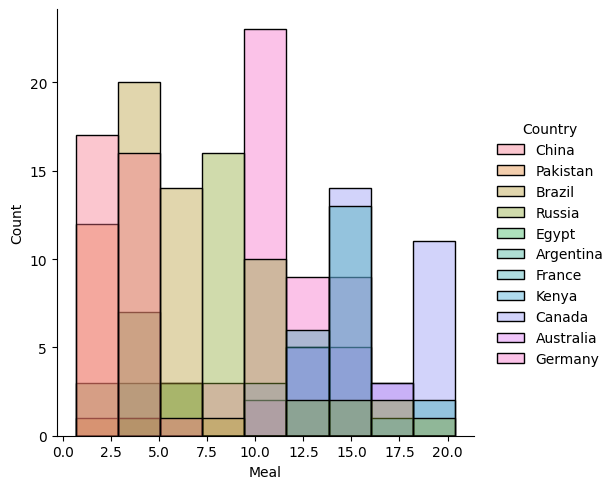

In [ ]:
sns.displot(data=df_seleccion, x="Meal", hue="Country", alpha = 0.4 )

* En el histograma, los precios de la comidas, se vuelven hacia la izquierda, con valores hasta los 15 dólares y algunos pocos extendidos, justamente los países desarrollados, donde los costos de vida son altos, como Australia o Alemania. En los países menos desarrollados, generalmente el costo del alimento es bajo, pero también son los salarios. La relación entre ellos se observa por ejemplo en Alemania con un costo promedio de una comida en usd 18 los salarios son de usd 2600, en cambio en Egipto está en usd 10 pero los salarios rondan los bajísimos usd 200. Esto se replica en ambos grupos (desarrollados y no desarrollados).


<Axes: xlabel='City', ylabel='Shoes'>

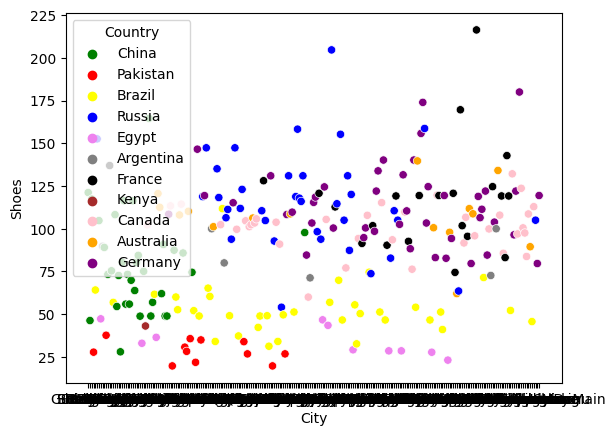

In [ ]:
sns.scatterplot(data=df_seleccion, x="City", y="Shoes", hue = 'Country', palette = ['green', 'red', 'yellow', 'blue', 'violet', 'grey', 'black', 'brown', 'pink', 'orange', 'purple'] )

* Se observa en cada uno los movimientos de los precios en dólares según las regiones, por ejemplo en el de dispersión usé la variable Zapatos, donde Pakistán tiene el menor precio (30 usd.) entiendo que por ser un país muy enfocado en la fabricación textil con mano de obra muy barata.

<Axes: xlabel='ToyotaCorolla', ylabel='Count'>

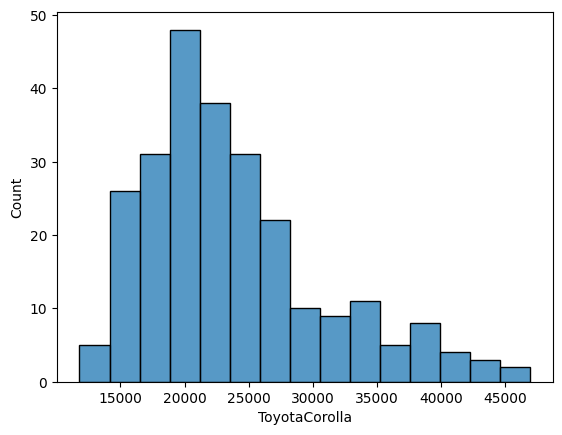

In [ ]:
sns.histplot(data=df_seleccion, x="ToyotaCorolla")


Text(0.5, 0, 'País')

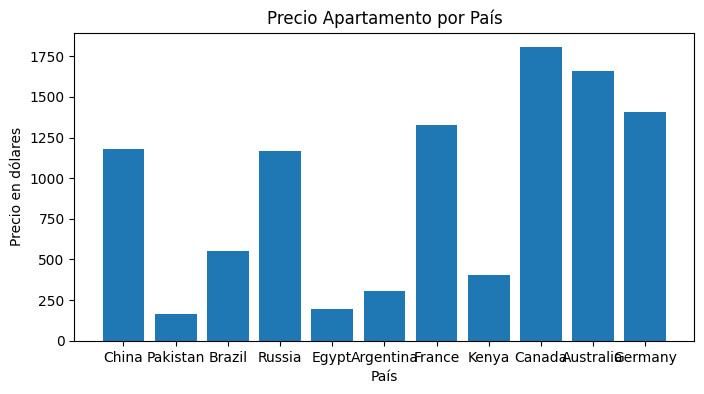

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(df_seleccion.Country, df_seleccion.Apart1)
ax.set_title('Precio Apartamento por País')
ax.set_ylabel('Precio en dólares')
ax.set_xlabel('País')

* Por último, un gráfico de barras, donde medimos el precio del alquiler de un departamento en el centro, y nos arroja similares datos, con gran división entre países desarrollados con precio elevados como Australia cerca de los usd 3500 y en el otro extremo con Pakistán o Egipto, con valores entre usd 100 y usd 200.

<Axes: xlabel='Gasoline', ylabel='Country'>

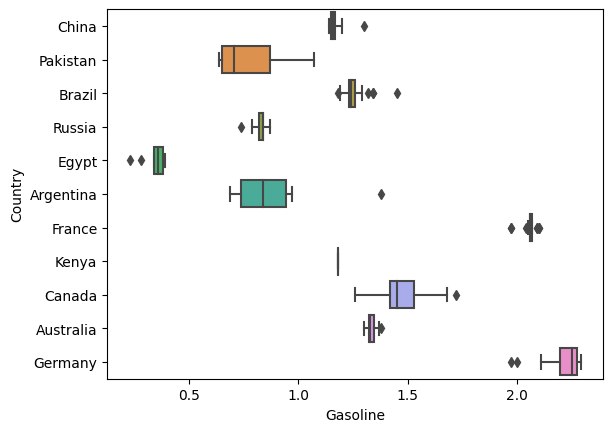

In [ ]:
sns.boxplot(x="Gasoline", y="Country", data=df_seleccion)

* Otro caso a destacar, en Argentina (subsidio del gobierno) o Egipto con un precio de la gasolina muy bajo, Alemania y Francia muy alto, por encima de los usd 2.

<Axes: xlabel='Salary', ylabel='Country'>

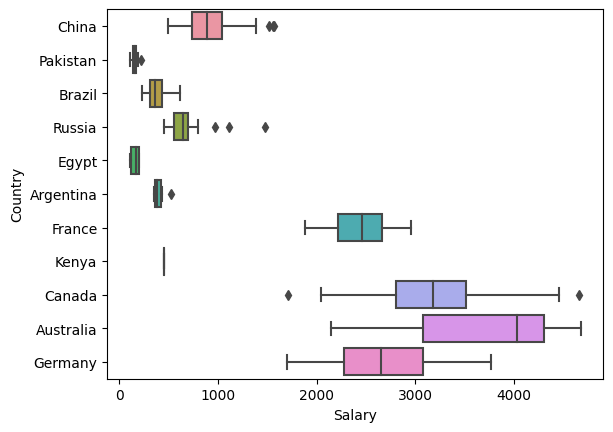

In [ ]:
sns.boxplot(x="Salary", y="Country", data=df_seleccion)

<Axes: xlabel='BuyApartm2', ylabel='Country'>

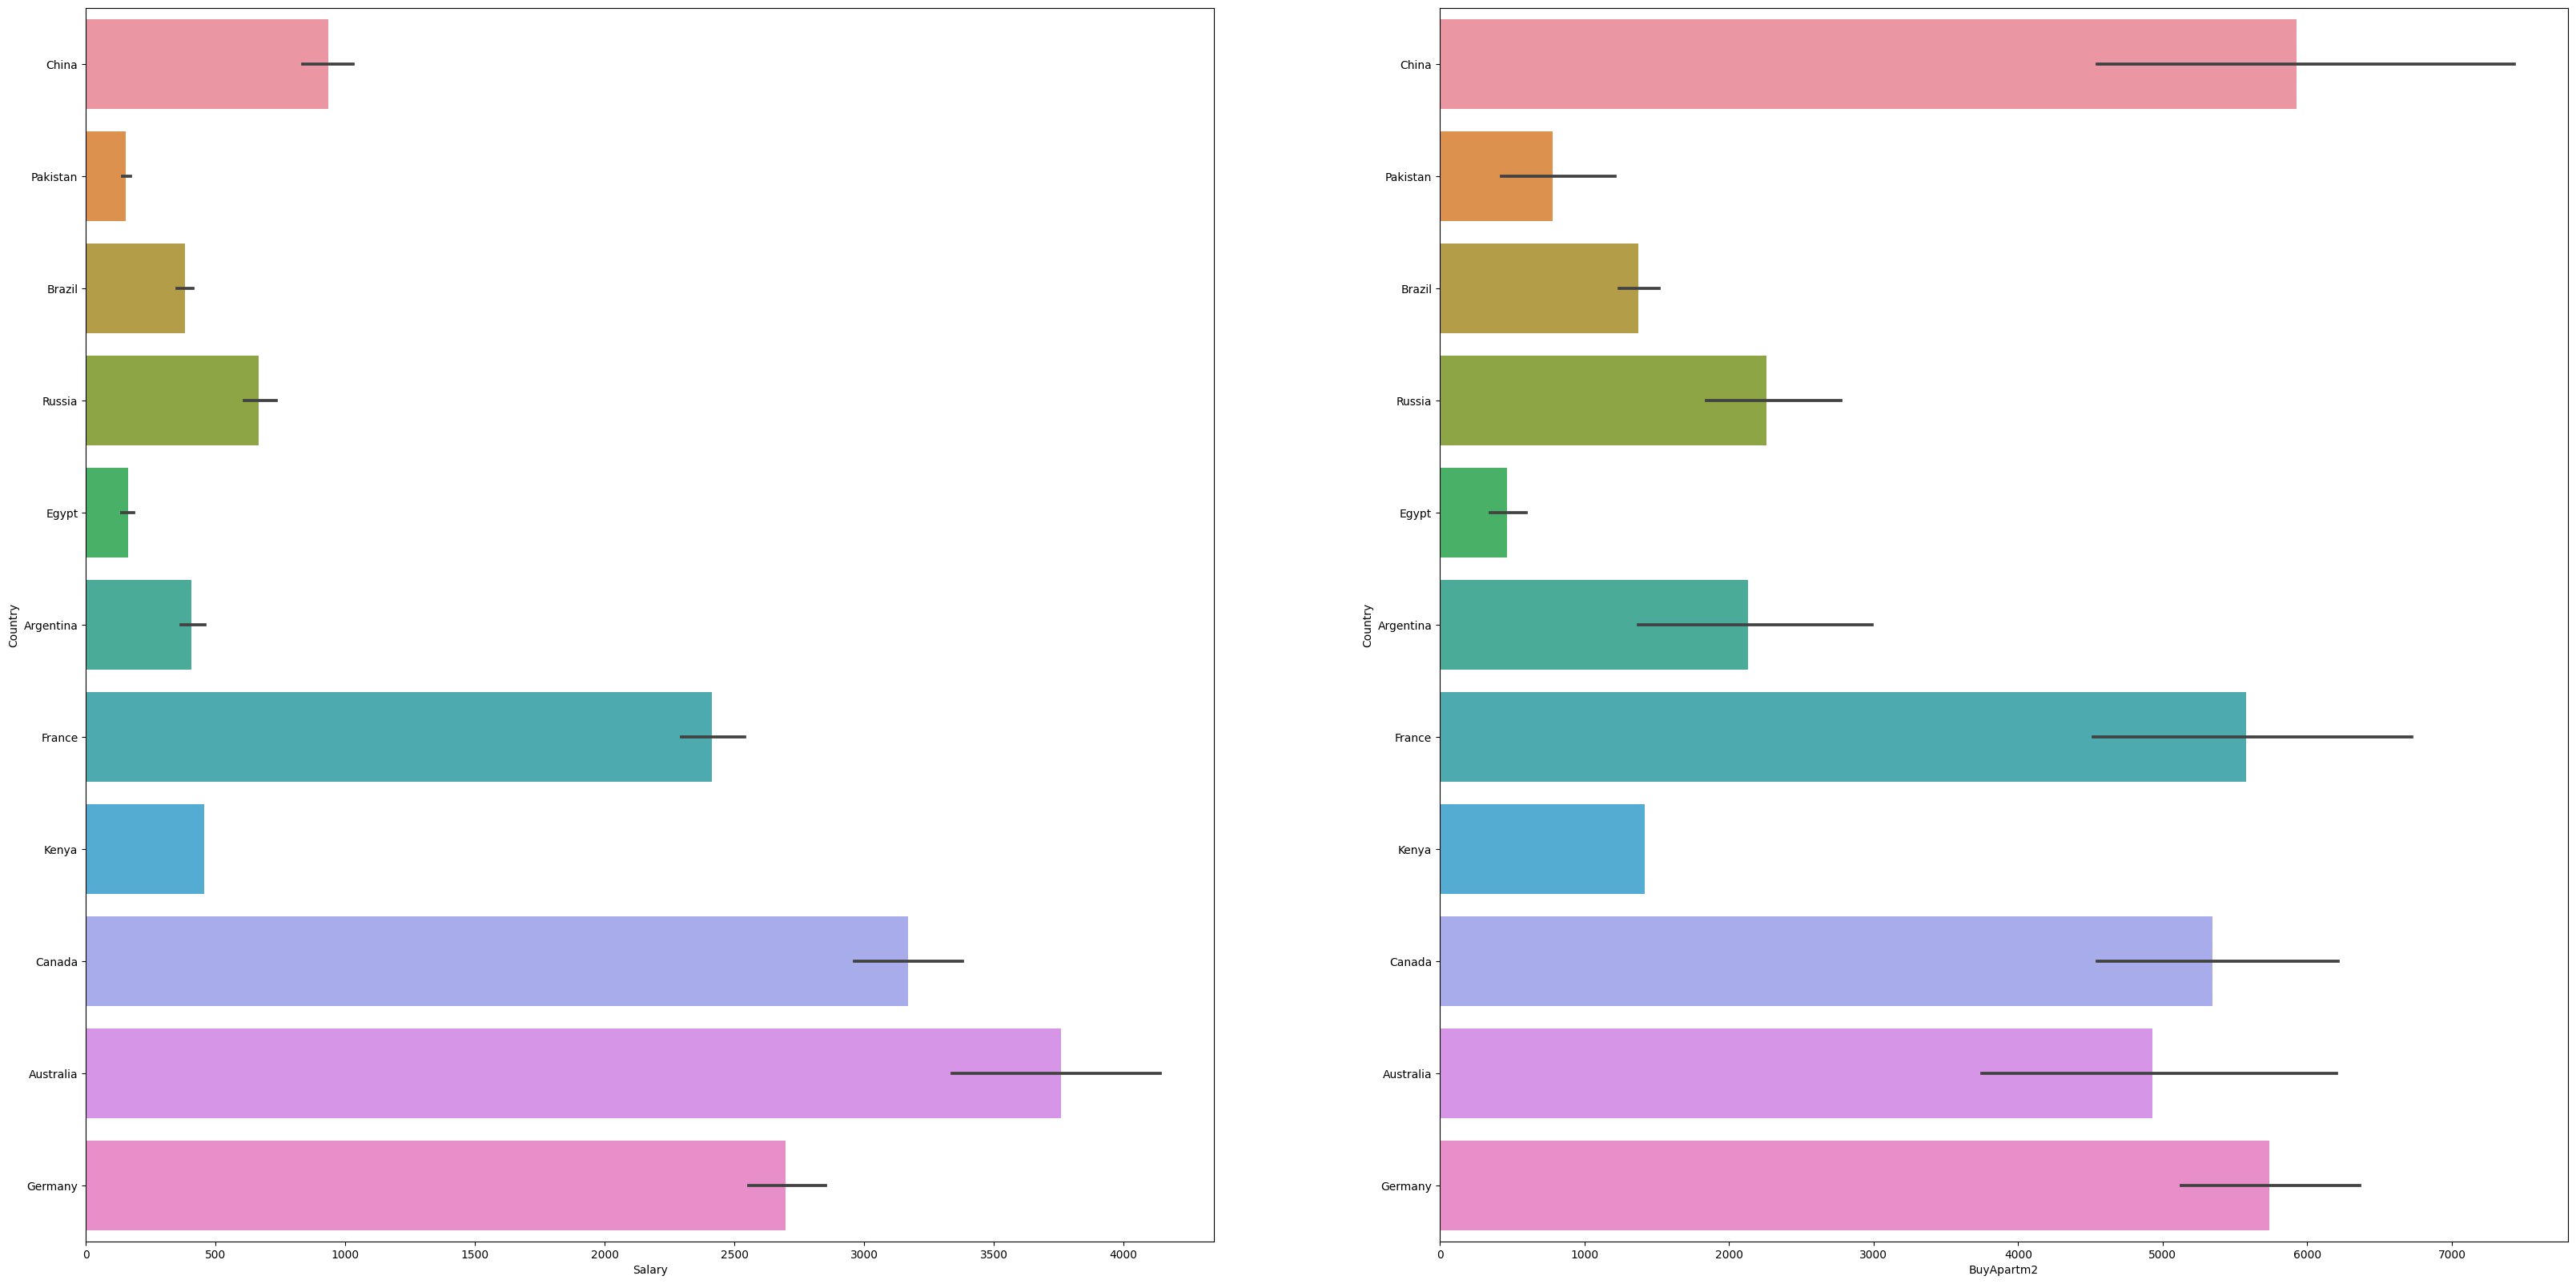

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(40, 20))

sns.barplot(x="Salary", y="Country", data=df_seleccion, ax=axs[0])
sns.barplot(x="BuyApartm2", y="Country", data=df_seleccion, ax=axs[1])

* Los países desarrollados tienen ingresos muy superiores a los que no lo están, aunque también observamos que el costo por m2 también es más elevado. Basándonos en esta relación, en países como Australia (usd3500) o Alemania(usd2500), un individuo podrá pagar más rápidamente un crédito que en Egipto (usd200) O Pakistán (usd200). El último gráfico de barras, donde tenemos de un lado el ingreso y el otro el costo del m2, se ve bastante armónico o relacionado, salvo en casos como China o Argentina donde el costo por m2 es mucho más elevado visualmente que el salario. En el caso específico de Argentina, se debe a una tremenda inflación y devaluación del salario (usd300), aunque también genera una oportunidad a largo plazo de recuperación, de invertir en proyectos inmobiliarios actuales (usd2500 m2), para apostar a una recuperación futura.

# DATA PROFILING (Análisis Extra)

Selecciono algunas variables para analizar con Pandas Profiling, debido al tamaño enorme que se genera al meter todas las variables.

* Se puede observar tanto en Pandas Profiling, con algunas variables y en el Heatmap con todas sus variables, una buena correlación entre las variables que fueron previamente seleccionadas a través de los algoritmos de selección.
* Estas variable son Salary, BuyApartm2 y una extra que no utilicé, que es Meal.

In [ ]:
df_seleccion_profiling = df_seleccion[['Meal', 'Taxi1km', 'Ticket', 'Gasoline', 'ToyotaCorolla', 'Internet', 'Cinema', 'BuyApartm2', 'Apart1out', 'Salary']]
df_seleccion_profiling

In [ ]:
#Data Profiling Seleccion
profile = pandas_profiling.ProfileReport(df_seleccion_profiling)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Data Profiling Total
profile = pandas_profiling.ProfileReport(df_seleccion)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# HEATMAP (Análisis Extra)

<ipython-input-42-0df910601946>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_seleccion.corr(), annot = True, cmap = 'Wistia')


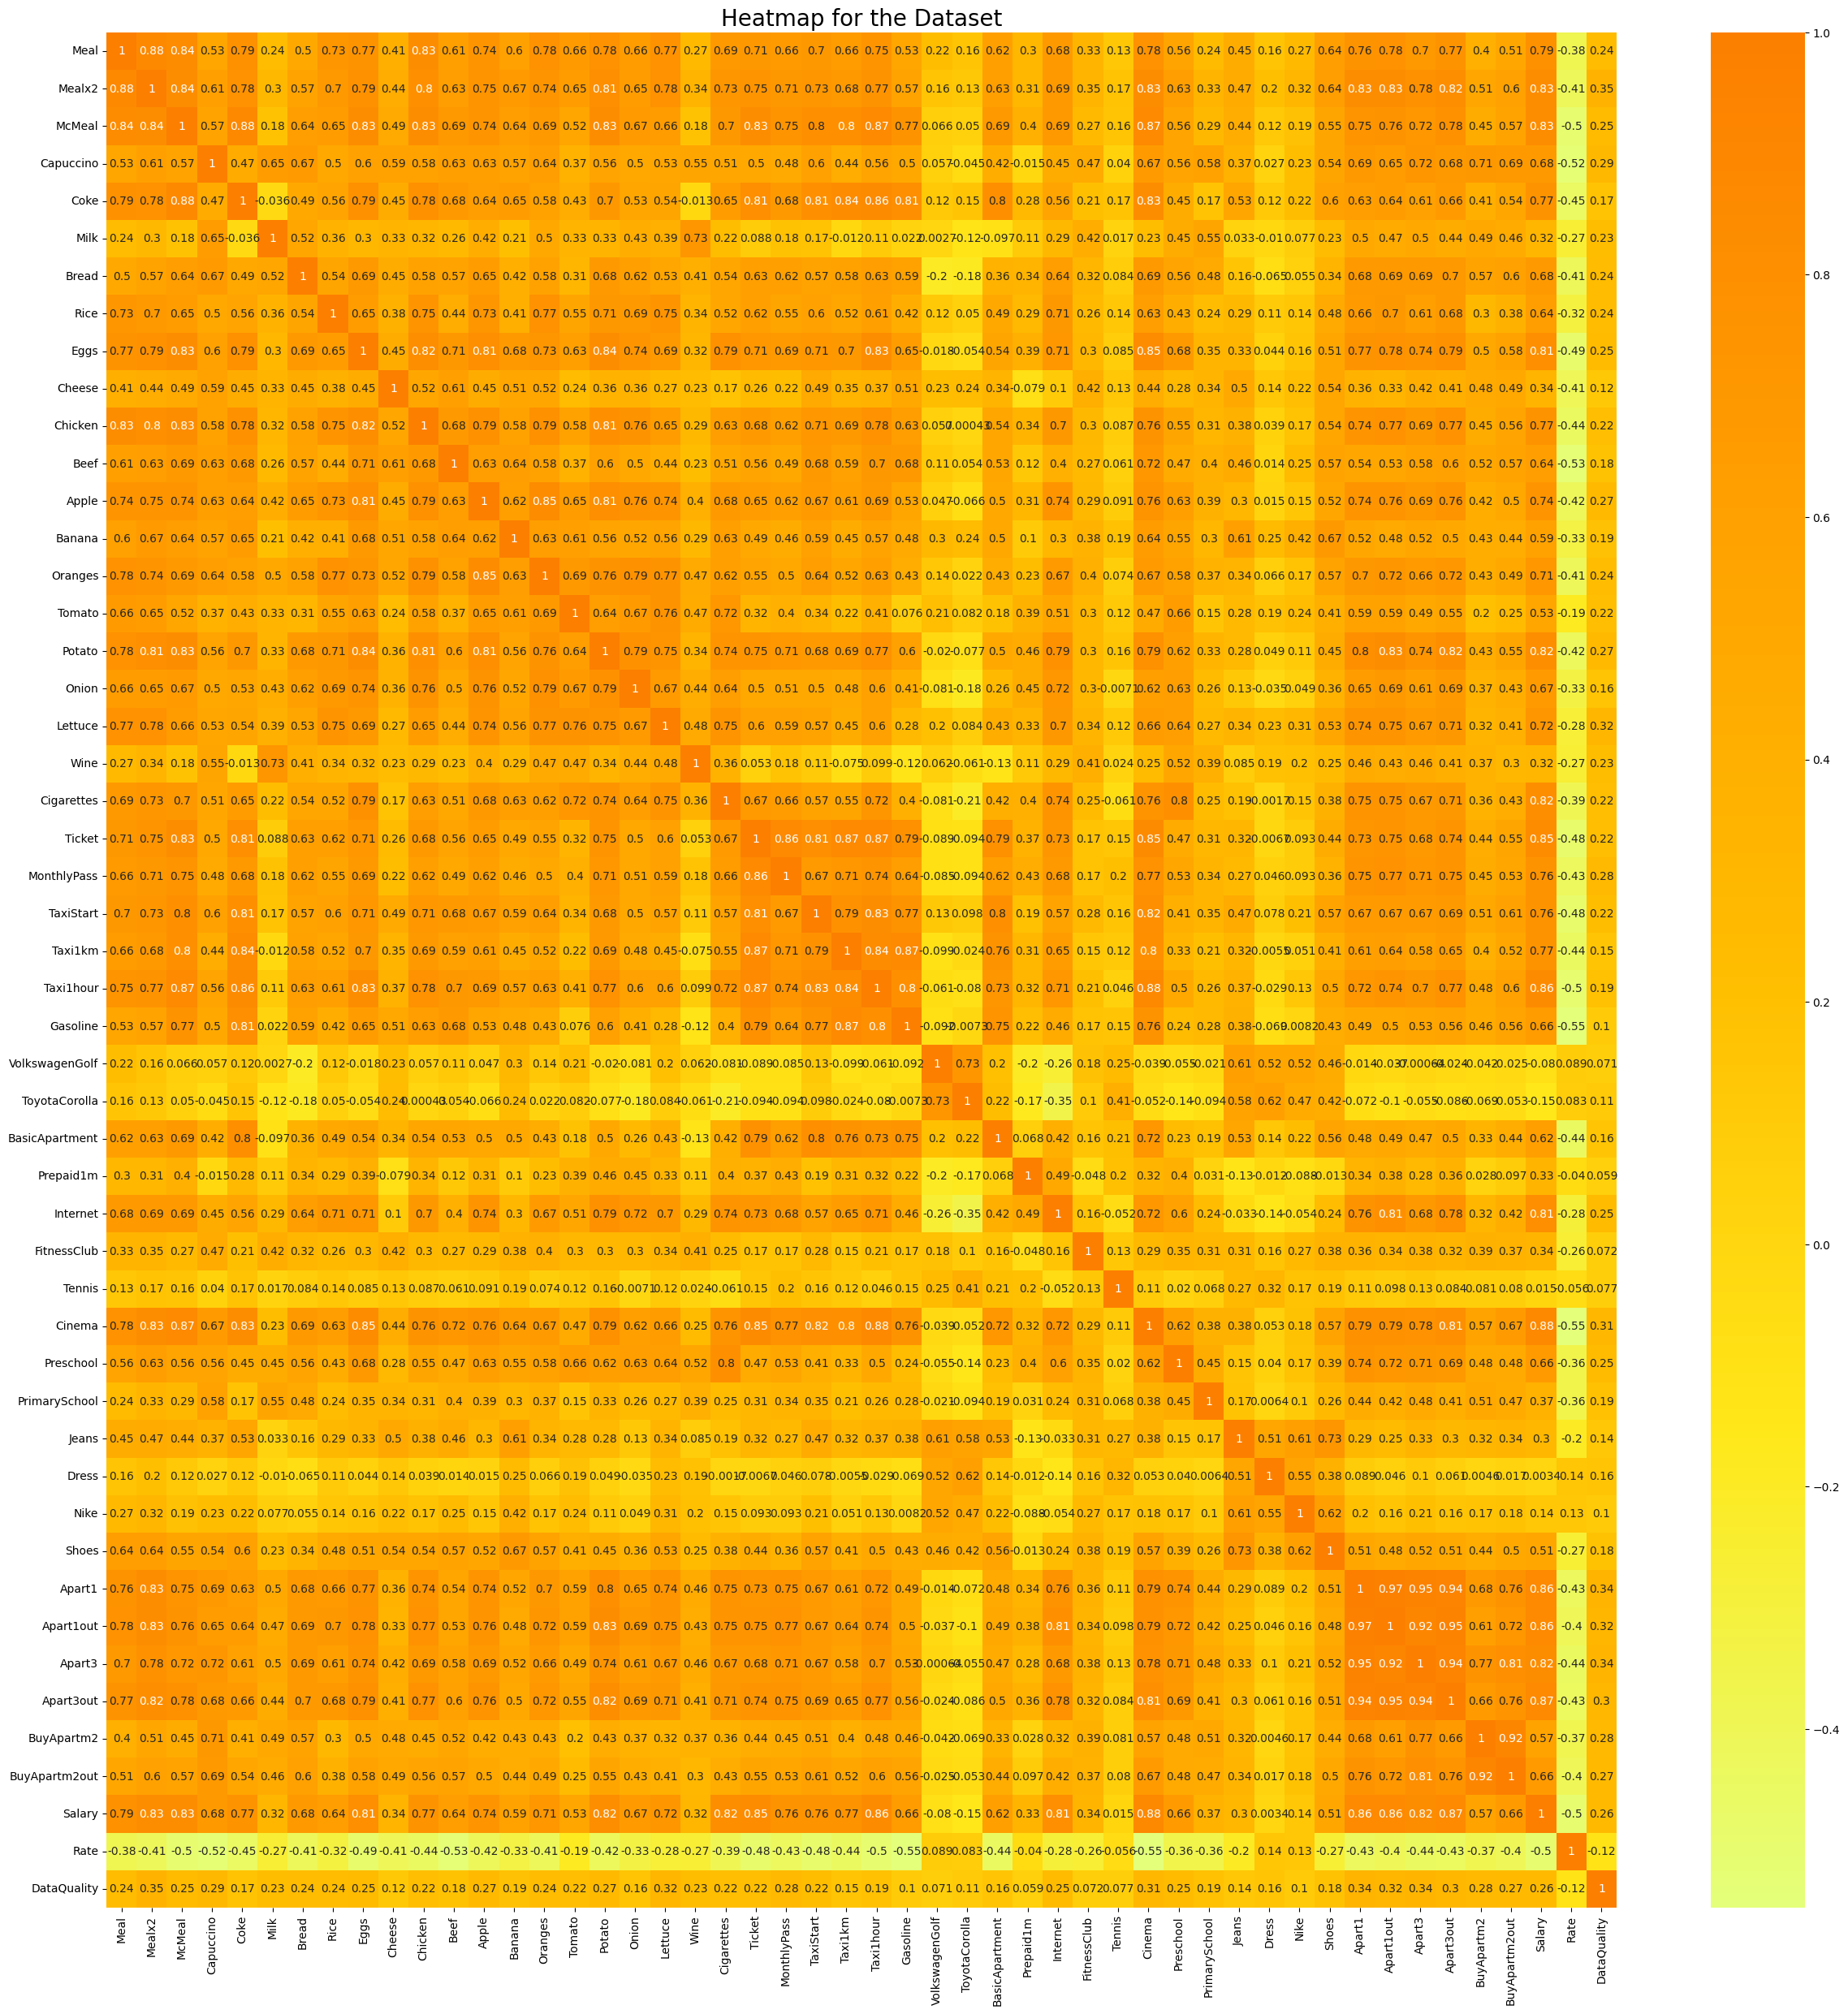

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (30, 30)

sns.heatmap(df_seleccion.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

<Axes: xlabel='BuyApartm2', ylabel='Salary'>

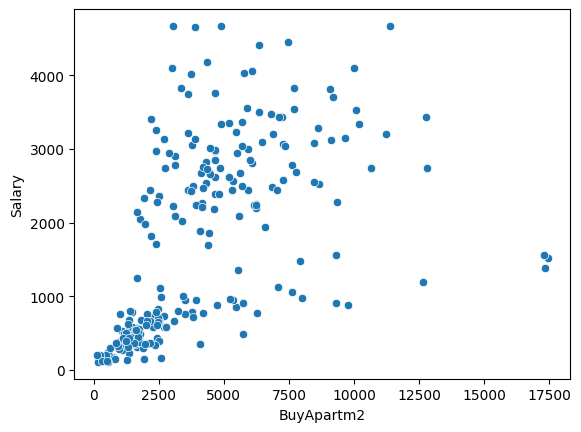

In [ ]:
sns.scatterplot(data = df_seleccion_profiling, x = 'BuyApartm2', y = 'Salary')

<Axes: xlabel='Salary', ylabel='Meal'>

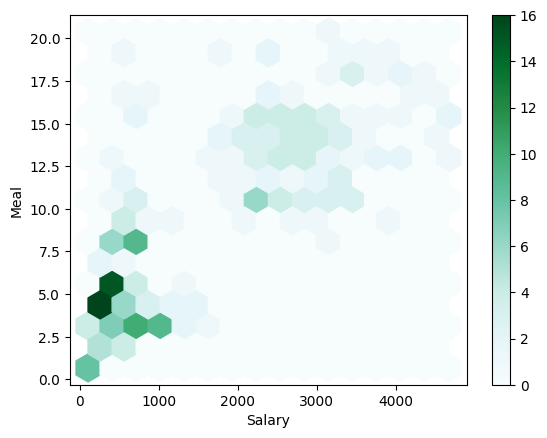

In [ ]:
df_seleccion_profiling.plot.hexbin(x='Salary', y='Meal', gridsize=15)

# LIMPIEZA (se realizó previamente un renombrado y eliminación de columna)

In [ ]:
df_livingcost.dtypes

City               object
Country            object
Meal              float64
Mealx2            float64
McMeal            float64
DomesticBeer      float64
ImportedBeer      float64
Capuccino         float64
Coke              float64
Water             float64
Milk              float64
Bread             float64
Rice              float64
Eggs              float64
Cheese            float64
Chicken           float64
Beef              float64
Apple             float64
Banana            float64
Oranges           float64
Tomato            float64
Potato            float64
Onion             float64
Lettuce           float64
Water             float64
Wine              float64
DomesticBeer      float64
ImportedBeer      float64
Cigarettes        float64
Ticket            float64
MonthlyPass       float64
TaxiStart         float64
Taxi1km           float64
Taxi1hour         float64
Gasoline          float64
VolkswagenGolf    float64
ToyotaCorolla     float64
BasicApartment    float64
Prepaid1m   

# ELIMINACION DE NULOS

In [ ]:
df_livingcost.dropna(inplace = True)
df_livingcost

City        Country   Meal  Mealx2  McMeal  DomesticBeer  \
0                   Delhi          India   4.90   22.04    4.28          1.84   
1                Shanghai          China   5.59   40.51    5.59          1.12   
2                 Jakarta      Indonesia   2.54   22.25    3.50          2.02   
3                  Manila    Philippines   3.54   27.40    3.54          1.24   
4                   Seoul    South Korea   7.16   52.77    6.03          3.02   
...                   ...            ...    ...     ...     ...           ...   
4727    Erlenbach am Main        Germany  15.58   51.93    8.31          4.15   
4732           Gig Harbor  United States  12.00   40.00   10.50          7.00   
4846  Murovani Kurylivtsi        Ukraine   2.71   12.17    2.68          0.67   
4863             Tirupati          India   2.45    9.18    4.28          2.11   
4867         Egilsstadhir        Iceland  17.30   70.61    8.47          4.24   

      ImportedBeer  Capuccino  Coke  Water  ...   Shoes   Apart1  Apart1out  \
0             3.67       1.78  0.48   0.19  ...   36.26   223.87     133.38   
1             4.19       3.96  0.52   0.32  ...  121.19  1080.07     564.30   
2             3.18       2.19  0.59   0.27  ...   80.32   482.85     270.15   
3             1.90       2.91  0.93   0.51  ...   61.82   559.52     281.78   
4             4.52       3.86  1.46   0.78  ...  108.30   809.83     583.60   
...            ...        ...   ...    ...  ...     ...      ...        ...   
4727          4.15       3.40  2.54   2.35  ...  119.45   804.99     640.53   
4732          6.00       5.15  2.48   1.92  ...  101.67  1800.00    2000.00   
4846          1.08       0.68  0.24   0.13  ...   60.87   108.21      94.68   
4863          3.06       2.01  0.46   0.13  ...   37.13    82.64      61.21   
4867          3.53       3.95  1.77   1.41  ...  145.46   635.50     529.59   

       Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary   Rate  \
0      596.16     325.82     2619.46        1068.90   586.35   7.96   
1     2972.57    1532.23    17333.09        9174.88  1382.83   5.01   
2     1117.69     584.37     2694.05        1269.44   483.19   9.15   
3     1754.40     684.81     3536.04        2596.44   419.02   7.80   
4     2621.05    1683.74    21847.94       10832.90  2672.23   3.47   
...       ...        ...         ...            ...      ...    ...   
4727  2129.33    1256.82     7042.36        4050.92  2445.27   2.35   
4732  3000.00    2400.00     3821.19        2852.44  4500.00   5.22   
4846   162.31     121.74      236.71         229.94   363.85  13.05   
4863   183.64     128.55      658.89         395.34   612.13   7.97   
4867  1694.68    1412.23     2012.43        1765.29  2471.40   5.00   

      DataQuality  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
...           ...  
4727          0.0  
4732          0.0  
4846          0.0  
4863          0.0  
4867          0.0  

[1264 rows x 58 columns]

# REINDEXACION

In [ ]:
df_reindexado = df_livingcost.reset_index()
df_reindexado

index                 City        Country   Meal  Mealx2  McMeal  \
0         0                Delhi          India   4.90   22.04    4.28   
1         1             Shanghai          China   5.59   40.51    5.59   
2         2              Jakarta      Indonesia   2.54   22.25    3.50   
3         3               Manila    Philippines   3.54   27.40    3.54   
4         4                Seoul    South Korea   7.16   52.77    6.03   
...     ...                  ...            ...    ...     ...     ...   
1259   4727    Erlenbach am Main        Germany  15.58   51.93    8.31   
1260   4732           Gig Harbor  United States  12.00   40.00   10.50   
1261   4846  Murovani Kurylivtsi        Ukraine   2.71   12.17    2.68   
1262   4863             Tirupati          India   2.45    9.18    4.28   
1263   4867         Egilsstadhir        Iceland  17.30   70.61    8.47   

      DomesticBeer  ImportedBeer  Capuccino  Coke  ...   Shoes   Apart1  \
0             1.84          3.67       1.78  0.48  ...   36.26   223.87   
1             1.12          4.19       3.96  0.52  ...  121.19  1080.07   
2             2.02          3.18       2.19  0.59  ...   80.32   482.85   
3             1.24          1.90       2.91  0.93  ...   61.82   559.52   
4             3.02          4.52       3.86  1.46  ...  108.30   809.83   
...            ...           ...        ...   ...  ...     ...      ...   
1259          4.15          4.15       3.40  2.54  ...  119.45   804.99   
1260          7.00          6.00       5.15  2.48  ...  101.67  1800.00   
1261          0.67          1.08       0.68  0.24  ...   60.87   108.21   
1262          2.11          3.06       2.01  0.46  ...   37.13    82.64   
1263          4.24          3.53       3.95  1.77  ...  145.46   635.50   

      Apart1out   Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary  \
0        133.38   596.16     325.82     2619.46        1068.90   586.35   
1        564.30  2972.57    1532.23    17333.09        9174.88  1382.83   
2        270.15  1117.69     584.37     2694.05        1269.44   483.19   
3        281.78  1754.40     684.81     3536.04        2596.44   419.02   
4        583.60  2621.05    1683.74    21847.94       10832.90  2672.23   
...         ...      ...        ...         ...            ...      ...   
1259     640.53  2129.33    1256.82     7042.36        4050.92  2445.27   
1260    2000.00  3000.00    2400.00     3821.19        2852.44  4500.00   
1261      94.68   162.31     121.74      236.71         229.94   363.85   
1262      61.21   183.64     128.55      658.89         395.34   612.13   
1263     529.59  1694.68    1412.23     2012.43        1765.29  2471.40   

       Rate  DataQuality  
0      7.96          1.0  
1      5.01          1.0  
2      9.15          1.0  
3      7.80          1.0  
4      3.47          1.0  
...     ...          ...  
1259   2.35          0.0  
1260   5.22          0.0  
1261  13.05          0.0  
1262   7.97          0.0  
1263   5.00          0.0  

[1264 rows x 59 columns]

# ELIMINA COLUMNAS Index y DataQuality

In [ ]:
df_reindexado.drop('index', axis='columns', inplace=True)

In [ ]:
df_reindexado.drop('DataQuality', axis='columns', inplace=True)

In [ ]:
df_reindexado

City        Country   Meal  Mealx2  McMeal  DomesticBeer  \
0                   Delhi          India   4.90   22.04    4.28          1.84   
1                Shanghai          China   5.59   40.51    5.59          1.12   
2                 Jakarta      Indonesia   2.54   22.25    3.50          2.02   
3                  Manila    Philippines   3.54   27.40    3.54          1.24   
4                   Seoul    South Korea   7.16   52.77    6.03          3.02   
...                   ...            ...    ...     ...     ...           ...   
1259    Erlenbach am Main        Germany  15.58   51.93    8.31          4.15   
1260           Gig Harbor  United States  12.00   40.00   10.50          7.00   
1261  Murovani Kurylivtsi        Ukraine   2.71   12.17    2.68          0.67   
1262             Tirupati          India   2.45    9.18    4.28          2.11   
1263         Egilsstadhir        Iceland  17.30   70.61    8.47          4.24   

      ImportedBeer  Capuccino  Coke  Water  ...    Nike   Shoes   Apart1  \
0             3.67       1.78  0.48   0.19  ...   49.35   36.26   223.87   
1             4.19       3.96  0.52   0.32  ...   86.55  121.19  1080.07   
2             3.18       2.19  0.59   0.27  ...   72.89   80.32   482.85   
3             1.90       2.91  0.93   0.51  ...   69.47   61.82   559.52   
4             4.52       3.86  1.46   0.78  ...   70.21  108.30   809.83   
...            ...        ...   ...    ...  ...     ...     ...      ...   
1259          4.15       3.40  2.54   2.35  ...   97.93  119.45   804.99   
1260          6.00       5.15  2.48   1.92  ...   87.17  101.67  1800.00   
1261          1.08       0.68  0.24   0.13  ...   59.24   60.87   108.21   
1262          3.06       2.01  0.46   0.13  ...   38.77   37.13    82.64   
1263          3.53       3.95  1.77   1.41  ...  141.22  145.46   635.50   

      Apart1out   Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary   Rate  
0        133.38   596.16     325.82     2619.46        1068.90   586.35   7.96  
1        564.30  2972.57    1532.23    17333.09        9174.88  1382.83   5.01  
2        270.15  1117.69     584.37     2694.05        1269.44   483.19   9.15  
3        281.78  1754.40     684.81     3536.04        2596.44   419.02   7.80  
4        583.60  2621.05    1683.74    21847.94       10832.90  2672.23   3.47  
...         ...      ...        ...         ...            ...      ...    ...  
1259     640.53  2129.33    1256.82     7042.36        4050.92  2445.27   2.35  
1260    2000.00  3000.00    2400.00     3821.19        2852.44  4500.00   5.22  
1261      94.68   162.31     121.74      236.71         229.94   363.85  13.05  
1262      61.21   183.64     128.55      658.89         395.34   612.13   7.97  
1263     529.59  1694.68    1412.23     2012.43        1765.29  2471.40   5.00  

[1264 rows x 57 columns]

# SUMA DE COLUMNAS (gastos similares y reduzco cantidad de variables)

In [ ]:
df_reindexado['SumaMeal'] = df_reindexado['Meal'] + df_reindexado['Mealx2'] + df_reindexado['McMeal']
columnas_meals = ['Meal', 'Mealx2', 'McMeal']

In [ ]:
df_reindexado2 = df_reindexado.drop(columnas_meals, axis=1)

In [ ]:
df_reindexado2 ['SumaLiquido'] = df_reindexado2['Capuccino'] + df_reindexado2['Coke'] + df_reindexado2['Wine'] + df_reindexado2['Milk']
columnas_liquido = ['Capuccino', 'Coke', 'Wine', 'Milk']

In [ ]:
df_reindexado2 = df_reindexado2.drop(columnas_liquido, axis=1)

In [ ]:
df_reindexado2

City        Country  DomesticBeer  ImportedBeer  Water  \
0                   Delhi          India          1.84          3.67   0.19   
1                Shanghai          China          1.12          4.19   0.32   
2                 Jakarta      Indonesia          2.02          3.18   0.27   
3                  Manila    Philippines          1.24          1.90   0.51   
4                   Seoul    South Korea          3.02          4.52   0.78   
...                   ...            ...           ...           ...    ...   
1259    Erlenbach am Main        Germany          4.15          4.15   2.35   
1260           Gig Harbor  United States          7.00          6.00   1.92   
1261  Murovani Kurylivtsi        Ukraine          0.67          1.08   0.13   
1262             Tirupati          India          2.11          3.06   0.13   
1263         Egilsstadhir        Iceland          4.24          3.53   1.41   

      Bread  Rice  Eggs  Cheese  Chicken  ...   Apart1  Apart1out   Apart3  \
0      0.51  0.88  1.01    4.32     3.79  ...   223.87     133.38   596.16   
1      2.57  1.18  2.17   18.01     4.67  ...  1080.07     564.30  2972.57   
2      1.21  0.83  1.70    6.66     3.46  ...   482.85     270.15  1117.69   
3      1.19  0.89  1.73    5.06     4.19  ...   559.52     281.78  1754.40   
4      2.78  3.66  4.02   11.13    10.62  ...   809.83     583.60  2621.05   
...     ...   ...   ...     ...      ...  ...      ...        ...      ...   
1259   3.64  2.65  2.80   19.74     8.11  ...   804.99     640.53  2129.33   
1260   4.20  2.77  3.39   12.49    13.21  ...  1800.00    2000.00  3000.00   
1261   0.55  0.88  0.97    5.14     3.14  ...   108.21      94.68   162.31   
1262   0.57  0.64  0.82    4.90     2.57  ...    82.64      61.21   183.64   
1263   2.85  1.98  4.43    9.18    13.42  ...   635.50     529.59  1694.68   

      Apart3out  BuyApartm2  BuyApartm2out   Salary   Rate  SumaMeal  \
0        325.82     2619.46        1068.90   586.35   7.96     31.22   
1       1532.23    17333.09        9174.88  1382.83   5.01     51.69   
2        584.37     2694.05        1269.44   483.19   9.15     28.29   
3        684.81     3536.04        2596.44   419.02   7.80     34.48   
4       1683.74    21847.94       10832.90  2672.23   3.47     65.96   
...         ...         ...            ...      ...    ...       ...   
1259    1256.82     7042.36        4050.92  2445.27   2.35     75.82   
1260    2400.00     3821.19        2852.44  4500.00   5.22     62.50   
1261     121.74      236.71         229.94   363.85  13.05     17.56   
1262     128.55      658.89         395.34   612.13   7.97     15.91   
1263    1412.23     2012.43        1765.29  2471.40   5.00     96.38   

      SumaLiquido  
0           12.78  
1           21.13  
2           24.72  
3           14.31  
4           22.53  
...           ...  
1259        12.75  
1260        19.01  
1261         4.91  
1262        14.07  
1263        21.96  

[1264 rows x 52 columns]

In [ ]:
numericas = [ 'SumaMeal', 'SumaLiquido', 'DomesticBeer', 'ImportedBeer', 'Water', 'Bread', 'Rice', 'Eggs', 'Cheese', 'Chicken', 'Beef', 'Apple', 'Banana', 'Oranges', 'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water', 'DomesticBeer', 'ImportedBeer', 'Cigarettes', 'Ticket', 'MonthlyPass', 'TaxiStart', 'Taxi1km', 'Taxi1hour', 'Gasoline', 'VolkswagenGolf', 'ToyotaCorolla', 'BasicApartment', 'Prepaid1m', 'Internet', 'FitnessClub', 'Tennis', 'Cinema', 'Preschool', 'PrimarySchool', 'Jeans', 'Dress', 'Shoes', 'Apart1', 'Apart1out', 'Apart3', 'Apart3out', 'BuyApartm2', 'BuyApartm2out', 'Salary', 'Rate']

# PREPARACION GRUPOS ENTRENAMIENTO

In [ ]:
# división de grupos
ss = ShuffleSplit(n_splits=1, random_state=0, test_size=0.3)
for train_index, test_index in ss.split(df_reindexado2):
    print(len(train_index))
    print(len(test_index))
df_reindexado2['Train'] = 0
df_reindexado2.loc[df_reindexado2.index.isin(train_index),'Train'] = 1

884
380


# ELIMINACION ATIPICOS

In [ ]:
# Eliminar atípicos generales por LocalOutlierFactor
outlierDetector = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02, novelty = True)
outlierDetector.fit(df_reindexado2.loc[df_reindexado2['Train'] == 1, numericas])
ind_train = outlierDetector.predict(df_reindexado2[numericas])
df_reindexado3 = df_reindexado2.loc[ind_train == 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [ ]:
df_reindexado3

City        Country  DomesticBeer  ImportedBeer  Water  \
0                   Delhi          India          1.84          3.67   0.19   
1                Shanghai          China          1.12          4.19   0.32   
2                 Jakarta      Indonesia          2.02          3.18   0.27   
3                  Manila    Philippines          1.24          1.90   0.51   
4                   Seoul    South Korea          3.02          4.52   0.78   
...                   ...            ...           ...           ...    ...   
1259    Erlenbach am Main        Germany          4.15          4.15   2.35   
1260           Gig Harbor  United States          7.00          6.00   1.92   
1261  Murovani Kurylivtsi        Ukraine          0.67          1.08   0.13   
1262             Tirupati          India          2.11          3.06   0.13   
1263         Egilsstadhir        Iceland          4.24          3.53   1.41   

      Bread  Rice  Eggs  Cheese  Chicken  ...  Apart1out   Apart3  Apart3out  \
0      0.51  0.88  1.01    4.32     3.79  ...     133.38   596.16     325.82   
1      2.57  1.18  2.17   18.01     4.67  ...     564.30  2972.57    1532.23   
2      1.21  0.83  1.70    6.66     3.46  ...     270.15  1117.69     584.37   
3      1.19  0.89  1.73    5.06     4.19  ...     281.78  1754.40     684.81   
4      2.78  3.66  4.02   11.13    10.62  ...     583.60  2621.05    1683.74   
...     ...   ...   ...     ...      ...  ...        ...      ...        ...   
1259   3.64  2.65  2.80   19.74     8.11  ...     640.53  2129.33    1256.82   
1260   4.20  2.77  3.39   12.49    13.21  ...    2000.00  3000.00    2400.00   
1261   0.55  0.88  0.97    5.14     3.14  ...      94.68   162.31     121.74   
1262   0.57  0.64  0.82    4.90     2.57  ...      61.21   183.64     128.55   
1263   2.85  1.98  4.43    9.18    13.42  ...     529.59  1694.68    1412.23   

      BuyApartm2  BuyApartm2out   Salary   Rate  SumaMeal  SumaLiquido  Train  
0        2619.46        1068.90   586.35   7.96     31.22        12.78      1  
1       17333.09        9174.88  1382.83   5.01     51.69        21.13      0  
2        2694.05        1269.44   483.19   9.15     28.29        24.72      0  
3        3536.04        2596.44   419.02   7.80     34.48        14.31      1  
4       21847.94       10832.90  2672.23   3.47     65.96        22.53      1  
...          ...            ...      ...    ...       ...          ...    ...  
1259     7042.36        4050.92  2445.27   2.35     75.82        12.75      1  
1260     3821.19        2852.44  4500.00   5.22     62.50        19.01      1  
1261      236.71         229.94   363.85  13.05     17.56         4.91      1  
1262      658.89         395.34   612.13   7.97     15.91        14.07      1  
1263     2012.43        1765.29  2471.40   5.00     96.38        21.96      0  

[1255 rows x 53 columns]

In [ ]:
df_dropped = df_reindexado3

# CAMBIO TIPO DE DATOS

In [ ]:
df_dropped['BuyApartm2'] = df_dropped['BuyApartm2'].astype(int)
df_dropped['BasicApartment'] = df_dropped['BasicApartment'].astype(int)
df_dropped['Salary'] = df_dropped['Salary'].astype(int)
df_dropped['Apart1'] = df_dropped['Apart1'].astype(int)
df_dropped['Apart3'] = df_dropped['Apart3'].astype(int)
df_dropped['Jeans'] = df_dropped['Jeans'].astype(int)
df_dropped['Internet'] = df_dropped['Internet'].astype(int)
df_dropped['BuyApartm2out'] = df_dropped['BuyApartm2out'].astype(int)

# SELECCION DE VARIABLES

In [ ]:
columnas = ['SumaMeal', 'SumaLiquido', 'DomesticBeer', 'ImportedBeer', 'Water', 'Bread', 'Rice', 'Eggs', 'Cheese', 'Chicken', 'Beef', 'Apple', 'Banana', 'Oranges', 'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water', 'DomesticBeer', 'ImportedBeer', 'Cigarettes', 'Ticket', 'MonthlyPass', 'TaxiStart', 'Taxi1km', 'Taxi1hour', 'Gasoline', 'VolkswagenGolf', 'ToyotaCorolla', 'BasicApartment', 'Prepaid1m', 'Internet', 'FitnessClub', 'Tennis', 'Cinema', 'Preschool', 'PrimarySchool', 'Jeans', 'Dress', 'Nike', 'Shoes', 'Apart1', 'Apart1out', 'Apart3', 'Apart3out', 'BuyApartm2out', 'Salary', 'Rate']
X = df_dropped.loc[df_dropped['Train'] == 1, columnas]
Y = df_dropped.loc[df_dropped['Train'] == 1, 'BuyApartm2']

results_chi2 = chi2(X.apply(lambda x: x.astype('category').cat.codes),Y)[0]
tabla_chi2 = pd.DataFrame(data = results_chi2, index = X.columns, columns = ['Chi2']).sort_values(by=['Chi2'], ascending=False)
tabla_chi2

Chi2
Salary          114232.434306
Apart3out       110799.807749
Apart1out       108831.469028
SumaMeal        105245.916853
SumaLiquido     103562.739036
BuyApartm2out   101254.527334
ToyotaCorolla    99388.122634
Shoes            97231.280456
Preschool        96847.565050
FitnessClub      95912.120791
Apart3           95359.173664
PrimarySchool    91961.008588
Nike             90719.157403
Apart1           89194.518790
Beef             84007.849952
Dress            81899.750707
Tennis           79795.758595
Cheese           79153.400147
MonthlyPass      78281.985501
Chicken          76452.541512
Rate             71908.186324
VolkswagenGolf   70422.603922
Taxi1hour        63081.556430
Tomato           52264.814335
Cinema           49751.850566
Cigarettes       47784.834516
Apple            47487.205499
Rice             45630.803133
Oranges          45460.655931
Bread            44283.220967
TaxiStart        41513.068740
Potato           41031.971165
Eggs             40294.580599
Water            40071.499689
Water            40071.499689
Ticket           38087.302185
DomesticBeer     37332.844427
DomesticBeer     37332.844427
Onion            36429.287335
DomesticBeer     36219.679692
DomesticBeer     36219.679692
ImportedBeer     34500.251524
ImportedBeer     34500.251524
ImportedBeer     33979.744018
ImportedBeer     33979.744018
BasicApartment   33895.116632
Taxi1km          33834.339681
Water            33239.126081
Water            33239.126081
Lettuce          26197.433116
Banana           20088.515415
Gasoline         18683.195440
Internet         12284.715006
Jeans            10014.441025
Prepaid1m         7057.319620

In [ ]:
numericas_gini = ['SumaMeal', 'SumaLiquido', 'DomesticBeer', 'ImportedBeer', 'Water', 'Bread', 'Rice', 'Eggs', 'Cheese', 'Chicken', 'Beef', 'Apple', 'Banana', 'Oranges', 'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water', 'DomesticBeer', 'ImportedBeer', 'Cigarettes', 'Ticket', 'MonthlyPass', 'TaxiStart', 'Taxi1km', 'Taxi1hour', 'Gasoline', 'VolkswagenGolf', 'ToyotaCorolla', 'BasicApartment', 'Prepaid1m', 'Internet', 'FitnessClub', 'Tennis', 'Cinema', 'Preschool', 'PrimarySchool', 'Jeans', 'Dress', 'Nike', 'Shoes', 'Apart1', 'Apart1out', 'Apart3', 'Apart3out', 'BuyApartm2out', 'Salary', 'Rate']
rf_entropy = RandomForestClassifier(n_estimators = 100, criterion='entropy', max_depth=10)
rf_gini = RandomForestClassifier(n_estimators = 100,criterion='gini',max_features=14,max_depth=20)

X = df_dropped.loc[df_dropped['Train']==1, numericas_gini]
y = df_dropped.loc[df_dropped['Train']==1, 'BuyApartm2']

rf_entropy.fit(X,y)
rf_gini.fit(X,y)


tabla_ent_gini = pd.DataFrame(data={
                   'Variables':X.columns,
                   'Gini':rf_gini.feature_importances_}).sort_values(by=['Gini'],ascending=False)
tabla_ent_gini

Variables      Gini
28          Ticket  0.025022
36  BasicApartment  0.024387
52   BuyApartm2out  0.024224
54            Rate  0.023737
45           Dress  0.022924
11          Cheese  0.022532
37       Prepaid1m  0.021960
35   ToyotaCorolla  0.021939
19           Onion  0.021269
3     DomesticBeer  0.021068
20         Lettuce  0.020497
44           Jeans  0.020485
33        Gasoline  0.020428
38        Internet  0.020365
53          Salary  0.020252
30       TaxiStart  0.020074
14           Apple  0.019833
18          Potato  0.019589
31         Taxi1km  0.019131
13            Beef  0.019048
51       Apart3out  0.018913
27      Cigarettes  0.018366
1      SumaLiquido  0.018276
9             Rice  0.018169
39     FitnessClub  0.018119
24    DomesticBeer  0.018070
40          Tennis  0.018024
10            Eggs  0.017842
50          Apart3  0.017798
43   PrimarySchool  0.017688
16         Oranges  0.017623
48          Apart1  0.017602
34  VolkswagenGolf  0.017591
7            Water  0.017449
46            Nike  0.017387
47           Shoes  0.017178
12         Chicken  0.017113
15          Banana  0.016879
42       Preschool  0.016686
8            Bread  0.016664
41          Cinema  0.016441
26    ImportedBeer  0.016234
49       Apart1out  0.016201
29     MonthlyPass  0.015716
32       Taxi1hour  0.015390
22           Water  0.014905
2     DomesticBeer  0.014665
6            Water  0.014530
23    DomesticBeer  0.014315
25    ImportedBeer  0.014150
17          Tomato  0.014078
21           Water  0.013930
0         SumaMeal  0.013316
5     ImportedBeer  0.012471
4     ImportedBeer  0.011457

# ENTRENAMIENTO SUPERVISADO

In [ ]:
varSelected = ['BasicApartment','BuyApartm2out']
varSelected

['BasicApartment', 'BuyApartm2out']

In [ ]:
X_train = df_dropped.loc[df_dropped['Train']==1, varSelected]
y_train = df_dropped.loc[df_dropped['Train']==1, 'BuyApartm2']

X_test = df_dropped.loc[df_dropped['Train']==0, varSelected]
y_test = df_dropped.loc[df_dropped['Train']==0, 'BuyApartm2']

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([5.6516947 , 0.96339794])

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual    Predicted
1      17333  9528.953332
2       2694  2003.719706
5       5229  3176.561082
10      7947  5732.761365
14      2429  2227.937639
...      ...          ...
1254   13315  9903.087435
1255    3295  3574.496184
1257    1432  1806.745096
1258    1201  2169.468707
1263    2012  2758.498126

[374 rows x 2 columns]

#EVALUACION MODELO SUPERVISADO

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 839.1296178347015
Mean Squared Error: 1798692.4189702664
Root Mean Squared Error: 1341.153391290596


In [ ]:
r2_score(y_test,y_pred)

0.761460879742199

EL modelo R2 nos indica un 76% de fiabilidad del modelo, en donde se seleccionaron variables para predecir el valor del m2 de compra, pero dándole al algoritmo variables similares. Si por el contrario usamos otrs variables combinadas como consumos individuales, nos arroja un 50% de fiabilidad.

# ENTRENAMIENTO NO SUPERVISADO

In [ ]:
df_livingcost = pd.read_csv(ruta)
df_livingcost

In [ ]:
df_livingcost.columns = ['Index', 'City','Country', 'Meal', 'Mealx2', 'McMeal', 'DomesticBeer', 'ImportedBeer', 'Capuccino', 'Coke', 'Water', 'Milk', 'Bread', 'Rice', 'Eggs', 'Cheese', 'Chicken', 'Beef', 'Apple', 'Banana', 'Oranges', 'Tomato', 'Potato', 'Onion', 'Lettuce', 'Water', 'Wine', 'DomesticBeer', 'ImportedBeer', 'Cigarettes', 'Ticket', 'MonthlyPass', 'TaxiStart', 'Taxi1km', 'Taxi1hour', 'Gasoline', 'VolkswagenGolf', 'ToyotaCorolla', 'BasicApartment', 'Prepaid1m', 'Internet', 'FitnessClub', 'Tennis', 'Cinema', 'Preschool', 'PrimarySchool', 'Jeans', 'Dress', 'Nike', 'Shoes', 'Apart1', 'Apart1out', 'Apart3', 'Apart3out', 'BuyApartm2', 'BuyApartm2out', 'Salary', 'Rate', 'DataQuality' ]

In [ ]:
df_livingcost.drop('Index', axis='columns', inplace=True)

In [ ]:
df_livingcost.drop('DataQuality', axis='columns', inplace=True)

In [ ]:
df_livingcost = df_livingcost.fillna(0)

In [ ]:
variables_cluster = ['BuyApartm2', 'Salary']

In [ ]:
X = df_livingcost[variables_cluster]
X.describe()

BuyApartm2        Salary
count    4874.000000   4874.000000
mean     1764.142569   1289.519672
std      4882.746122   1599.266276
min         0.000000      0.000000
25%         0.000000      0.000000
50%       612.620000    558.710000
75%      2337.070000   2208.107500
max    237522.540000  12681.260000

In [ ]:
escalador = StandardScaler()
X_est = pd.DataFrame(escalador.fit_transform(X),columns = X.columns)
X_est

BuyApartm2    Salary
0       0.175189 -0.439728
1       3.188891  0.058352
2       0.190467 -0.504239
3       0.362927 -0.544368
4       4.113640  0.864679
...          ...       ...
4869   -0.361338 -0.806402
4870   -0.361338 -0.806402
4871   -0.361338 -0.806402
4872   -0.361338 -0.806402
4873   -0.361338 -0.806402

[4874 rows x 2 columns]

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(X_est)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [ ]:
X_est['Cluster'] = kmeans.labels_

In [ ]:
df_destino = df_livingcost.join(X_est['Cluster'])

In [ ]:
pd.set_option('display.max_rows', 10)
df_destino

City      Country   Meal  Mealx2  McMeal  DomesticBeer  \
0                  Delhi        India   4.90   22.04    4.28          1.84   
1               Shanghai        China   5.59   40.51    5.59          1.12   
2                Jakarta    Indonesia   2.54   22.25    3.50          2.02   
3                 Manila  Philippines   3.54   27.40    3.54          1.24   
4                  Seoul  South Korea   7.16   52.77    6.03          3.02   
...                  ...          ...    ...     ...     ...           ...   
4869        Peterborough    Australia   0.00    0.00    0.00          0.00   
4870          Georgetown    Australia   0.00    0.00    0.00          0.00   
4871  Ixtapa Zihuatanejo       Mexico   5.19   31.13   12.97          0.99   
4872             Iqaluit       Canada  29.78   74.61   13.77          6.70   
4873              Neiafu        Tonga   0.00   29.53   10.55         10.55   

      ImportedBeer  Capuccino  Coke  Water  ...   Shoes   Apart1  Apart1out  \
0             3.67       1.78  0.48   0.19  ...   36.26   223.87     133.38   
1             4.19       3.96  0.52   0.32  ...  121.19  1080.07     564.30   
2             3.18       2.19  0.59   0.27  ...   80.32   482.85     270.15   
3             1.90       2.91  0.93   0.51  ...   61.82   559.52     281.78   
4             4.52       3.86  1.46   0.78  ...  108.30   809.83     583.60   
...            ...        ...   ...    ...  ...     ...      ...        ...   
4869          0.00       0.00  0.00   0.00  ...    0.00     0.00       0.00   
4870          0.00       0.00  0.00   0.00  ...    0.00     0.00       0.00   
4871          0.00       1.82  0.62   0.42  ...  103.78   415.11     259.44   
4872          8.93       3.72  3.54   4.10  ...    0.00     0.00       0.00   
4873          0.00       0.00  2.11   2.11  ...    0.00     0.00       0.00   

       Apart3  Apart3out  BuyApartm2  BuyApartm2out   Salary  Rate  Cluster  
0      596.16     325.82     2619.46        1068.90   586.35  7.96        1  
1     2972.57    1532.23    17333.09        9174.88  1382.83  5.01        0  
2     1117.69     584.37     2694.05        1269.44   483.19  9.15        1  
3     1754.40     684.81     3536.04        2596.44   419.02  7.80        1  
4     2621.05    1683.74    21847.94       10832.90  2672.23  3.47        0  
...       ...        ...         ...            ...      ...   ...      ...  
4869     0.00       0.00        0.00           0.00     0.00  0.00        1  
4870     0.00       0.00        0.00           0.00     0.00  0.00        1  
4871   518.89     415.11        0.00           0.00     0.00  0.00        1  
4872  2978.11    2978.11        0.00           0.00     0.00  6.53        1  
4873     0.00       0.00        0.00           0.00     0.00  0.00        1  

[4874 rows x 58 columns]

# ANALISIS DE MODELO NO SUPERVISADO

In [ ]:
numericas = ['BuyApartm2','Salary']
lof_model = LocalOutlierFactor(n_neighbors=10)
outlier_scores = lof_model.fit_predict(df_destino[numericas])

In [ ]:
# Crea un DataFrame con los datos y las etiquetas
df_prelimpio = pd.DataFrame(df_destino)
df_prelimpio['Outlier'] = outlier_scores

In [ ]:
# Filtrar el DataFrame para eliminar los valores atípicos
df_cleaned = df_prelimpio[df_prelimpio['Outlier'] != -1]

In [ ]:
# Quitar la columna 'Outlier'
df_cleaned = df_cleaned.drop(columns='Outlier')

In [ ]:
columnas_a_verificar = ['BuyApartm2', 'Salary']
valor_a_eliminar = 0

In [ ]:
df_cleaned_final = df_cleaned[df_cleaned['BuyApartm2'] != valor_a_eliminar]

In [ ]:
df_cleaned_plot = df_cleaned_final[df_cleaned_final['Salary'] != valor_a_eliminar]

<Axes: xlabel='BuyApartm2', ylabel='Salary'>

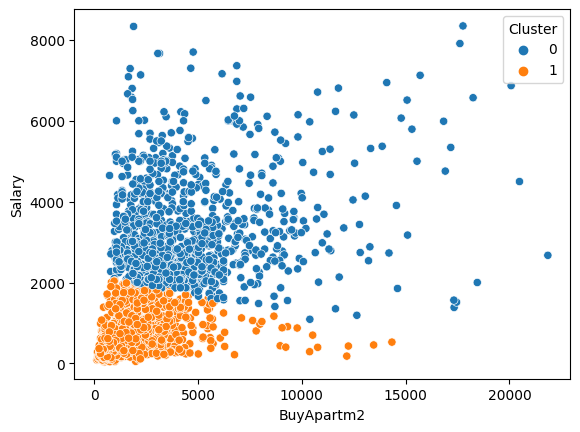

In [ ]:
sns.scatterplot(data = df_cleaned_plot, x = 'BuyApartm2', y = 'Salary', hue = 'Cluster')

In [ ]:
df_cluster0 = df_cleaned_plot[df_cleaned_plot['Cluster'].isin([0])]
df_cluster1 = df_cleaned_plot[df_cleaned_plot['Cluster'].isin([1])]

In [ ]:
df_cluster0 = df_cluster0.drop(df_cluster0[df_cluster0['BuyApartm2'] == 0].index)
df_cluster0 = df_cluster0.drop_duplicates(subset='Country')
pd.set_option('display.max_rows', 200)
df_cluster0.Country

1                      China
4                South Korea
10                     Japan
16                    Russia
20             United States
29                    France
30            United Kingdom
67              Saudi Arabia
81                     Spain
99                    Canada
103                Singapore
113                Australia
144                  Germany
163                   Kuwait
172                    Italy
183                   Taiwan
191     United Arab Emirates
247                  Austria
266                  Belgium
328              New Zealand
366                    Qatar
390                  Denmark
433                  Liberia
447                   Israel
449                   Sweden
456              Netherlands
462                   Norway
464                  Finland
475                  Ireland
501              Timor-Leste
504                Gibraltar
507              Switzerland
508                  Bahrain
510         French Polynesia
511           

In [ ]:
df_cluster1 = df_cluster1.drop(df_cluster1[df_cluster1['BuyApartm2'] == 0].index)
df_cluster1 = df_cluster1.drop_duplicates(subset='Country')
pd.set_option('display.max_rows', 200)
df_cluster1.Country

0                        India
2                    Indonesia
3                  Philippines
5                     Thailand
11                     Nigeria
12                    Pakistan
13                  Bangladesh
14                      Brazil
18                      Mexico
19                       Egypt
21                      Turkey
22                   Argentina
24                        Iran
25                       China
33                     Vietnam
38                        Peru
39                      Angola
51                    Malaysia
53                    Colombia
62                    Tanzania
63                       Chile
78                        Iraq
82                       Sudan
93                       Kenya
124               South Africa
128                    Morocco
129                Afghanistan
133                     Jordan
141               Saudi Arabia
147                    Algeria
162                   Ethiopia
167                      Yemen
169     

# STORYTELLING

* En base al objetivo de la empresa, en donde queríamos determinar oportunidades de inversión en bienes raíces a lo largo y ancho del planeta, nuestro equipo ha desarrollado a través de la investigación y del análisis de datos, sumado a la aplicación de modelos de algoritmos avanzados, un informe donde se visualiza distintos enfoques del negocio.

* Podemos observar en el gráfico principal dos grandes grupos seleccionados por el uso y entrenamiento del algoritmo; un grupo en color azul denominados “países desarrollados¨ y en amarillo el grupo ¨subdesarrollados¨
En el mismo se puede observar la ubicación o dispersión de los puntos que representan países, y al pasar con el mouse por cada uno de ellos, nos entrega el valor por m2 y salario promedio de cada lugar.

* Tenemos la mayor concentración en valores por m2 hasta los 5.000 dólares, y una marcada diferenciación de salarios promedios hasta los 2.000 dólares para países “subs” y de 2.000 hasta 5.000 dólares aproximadamente para países desarrollados.

* Se plantean con estos datos dos escenarios a grandes rasgos para los modelos de inversión: los de capitales conservadores donde a través de los créditos hipotecarios, el individuo requiere menor cantidad de años para pagarlos pero en países donde hay menor oportunidades (desarrollados) o aquellos capitales más arriesgados, donde las oportunidades y los retornos pueden ser mayores, debido al poco desarrollo en esos países mas atrasados económicamente, pero con mayor posibilidad de no tener un retorno de inversión como se espera.

* También hacemos notar, que se debe adjuntar a este informe, el socioeconómico y de leyes gubernamentales, para complementar con estos gráficos y determinar con mayor exactitud donde realizar las inversiones.

* Gracias a este análisis presentado de manera eficiente y detallada, ponemos a disposición la información analizada para que sus clientes puedan tomar decisiones más acertadas en función del capital y el retorno objetivo.

In [ ]:
!pip install chart_studio

In [ ]:
import chart_studio.plotly as py
import plotly.express as px

In [ ]:
fig = px.scatter(df_cleaned_plot, x='BuyApartm2', y='Salary', title='Países separados en grupos por Kmeans según Salario y precio de M2 de vivienda', color='Cluster', hover_data=['Country', 'City'])
fig.show()